[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 12** | Regressão I | Exercício 19

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 06 de junho de 2025.

---

# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from seaborn import load_dataset

In [12]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

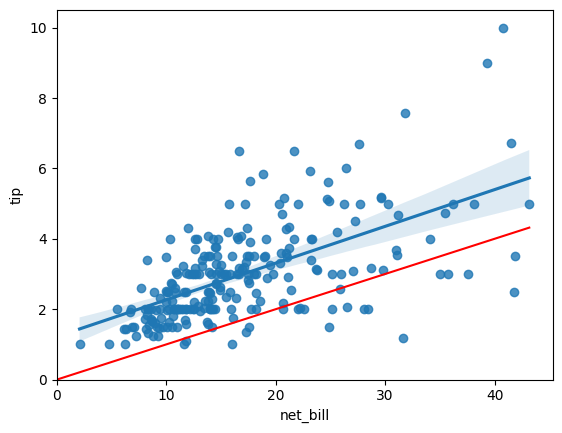

In [13]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [14]:
# Regressão linear de 'tip_pct' explicada por 'net_bill'
regression_model_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibir o resumo da regressão
print(regression_model_pct.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        20:59:28   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

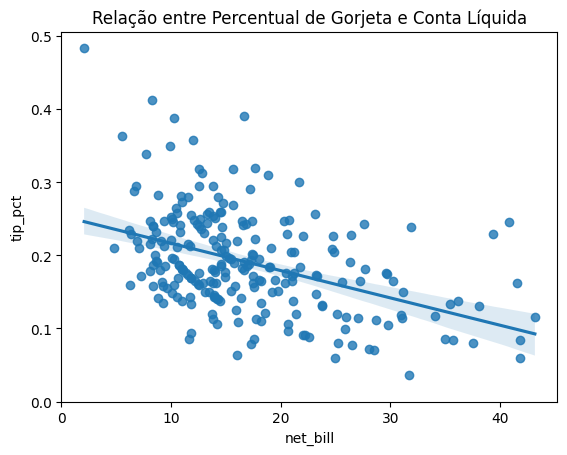

In [15]:
# Gráfico de dispersão entre 'tip_pct' e 'net_bill' com linha de regressão
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5])

# Opções estéticas para melhor visualização do gráfico
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.title('Relação entre Percentual de Gorjeta e Conta Líquida')
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os dois?

* Ajuste Linear: O primeiro gráfico tem um ajuste mais direto (gorjeta aumenta com a conta), enquanto o segundo mostra uma relação decrescente (percentual de gorjeta cai com contas maiores).

* Podemos comparar diretamente?: Não exatamente. O primeiro gráfico avalia o valor absoluto da gorjeta, enquanto o segundo lida com a proporção (percentual), o que muda a interpretação da relação entre as variáveis.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 2, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [18]:
# Regressão linear de 'tip' explicada por 'net_bill' (item 1)
regression_model = smf.ols('tip ~ net_bill', data=tips).fit()

# 1. Obtenção do valor predito para 'tip_pct'
pred_tip_pct = regression_model_pct.fittedvalues

# 2. Obtenção do valor predito para 'tip' como 'tip_pct * net_bill'
pred_tip = pred_tip_pct * tips['net_bill']

# 3. Ajuste do modelo para 'tip' e cálculo do R^2
ss_residual = ((tips['tip'] - pred_tip) ** 2).sum()  # Soma dos resíduos ao quadrado
ss_total = ((tips['tip'] - tips['tip'].mean()) ** 2).sum()  # Soma total ao quadrado
r_squared_tip = 1 - (ss_residual / ss_total)  # Cálculo do R^2

# Exibir o R^2 do modelo para 'tip'
print(f'R^2 para o modelo de "tip" a partir de "tip_pct * net_bill": {r_squared_tip}')

# 4. Comparação com o R^2 do item 1
r_squared_original = regression_model.rsquared  # R^2 do modelo original
print(f'R^2 do modelo original (tip ~ net_bill): {r_squared_original}')

R^2 para o modelo de "tip" a partir de "tip_pct * net_bill": 0.1088997484546137
R^2 do modelo original (tip ~ net_bill): 0.3325407312323705


* R² =0.1089: Esse valor indica que o modelo baseado no percentual de gorjeta (``tip_pct``) multiplicado pelo valor da conta líquida (``net_bill``) explica apenas 10,89% da variação nos valores de gorjeta (``tip``).

* R² =0.3325: O modelo original, que prevê a gorjeta diretamente a partir da conta líquida, explica 33,25% da variação em ``tip``. Isso é significativamente maior que o R2 do modelo baseado em ``tip_pct``.

* O modelo original que utiliza net_bill diretamente como variável explicativa é mais eficaz em prever o valor das gorjetas do que o modelo baseado no percentual de gorjeta.

* Isso sugere que a relação direta entre a conta líquida e o valor da gorjeta é mais consistente do que a relação entre o percentual de gorjeta e a conta líquida. Em outras palavras, o valor absoluto da gorjeta aumenta de forma mais previsível com o valor da conta do que o percentual da gorjeta.